In [218]:
import xarray as xr
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from dateutil.parser import parse

## Path to stack of Netcdfs and x,y coordinates

In [269]:
path = "/Users/gunnar/src/data/S2GM/processed/*.nc"
x_int = 120
y_int = 120

## Aux function to attach time dimension while loading files

In [270]:
def get_date(dat):
    t0 = dat.attrs['Temporal extent - Starting date']
    IT = dat.attrs['Temporal extent - Ending date']
    the_date = datetime.strptime(t0[0:10], '%Y-%m-%d') + (datetime.strptime(IT[0:10], '%Y-%m-%d') - datetime.strptime(t0[0:10], '%Y-%m-%d'))/2
    return dat.assign_coords(time=the_date)

In [271]:
pd = xr.open_mfdataset(path, concat_dim='time', preprocess=get_date)

In [272]:
bands = ['B1','B2','B3','B4','B5','B6','B7','B8','B8A','B11','B12']
wavelength = [443.9, 496.6, 560.0, 664.5, 703.9, 740.2, 782.5, 835.1, 864.8, 1613.7, 2202.4]

## Ugly code ahead; selecting point, dropping lat, lon, swap coordinates, and drop variable as coordinate, to be solved more elegant

In [273]:
da = pd[bands].sel(x=x_int, y=y_int).drop(['lon','lat']).to_array()

In [274]:
da.coords['wv'] = ('variable', wavelength)
da.swap_dims({'variable': 'wv'})
db = da.drop('variable')

## Plot sepctra by date and annotate them 

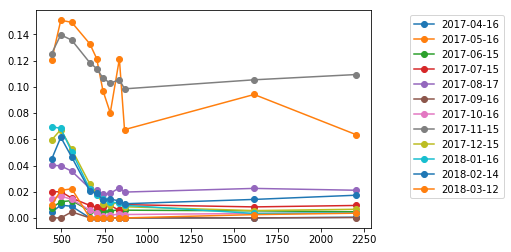

In [275]:
fig, ax = plt.subplots()
for t in db.time:
    ax.plot(db.wv, db.sel(time=t).data,'o-', label = str(t.time.data)[0:10])
plt.legend(bbox_to_anchor=(1.1, 1.))